Бустинг и градиентный бустинг

Бустинг — это метод ансамблевого обучения, который объединяет несколько
слабых моделей (обычно деревьев решений) для создания одной сильной модели.
Основная идея бустинга заключается в том, чтобы обучать модели последовательно, где
каждая новая модель старается исправить ошибки предыдущих. В отличие от случайного
леса, где деревья строятся независимо друг от друга, бустинг создает деревья
последовательно, и каждое новое дерево фокусируется на тех примерах, которые
предыдущие модели предсказали неверно.

Чтобы понять бустинг проще, представим следующую ситуацию. Допустим, вы
хотите научиться играть в шахматы. Сначала вы учитесь базовым правилам и играете
несколько партий, но часто проигрываете. После этого вы начинаете разбирать свои
ошибки — например, понимаете, что плохо защищаете короля. На следующей тренировке
вы фокусируетесь именно на этой слабой стороне и становитесь сильнее. С каждым
новым занятием вы исправляете слабые места, постепенно улучшая свои навыки. В
результате вы становитесь сильным игроком, не потому что сразу знали все, а потому что
последовательно устраняли ошибки.

Градиентный бустинг (Gradient Boosting) — это одна из самых популярных
реализаций бустинга. Его особенность в том, что каждая новая модель обучается на
ошибках предыдущей, используя градиентный спуск — метод оптимизации, который
помогает модели минимизировать общую ошибку. Однако не стоит пугаться сложных
терминов: главное — понимать суть процесса.

Представьте, что вы — садовник, который хочет вырастить идеальный сад. Сначала
вы сажаете деревья в случайном порядке. Потом вы замечаете, что некоторые растения
плохо растут из-за тени от больших деревьев. Вы корректируете расположение,
пересаживаете слабые растения туда, где больше света. Через время вы замечаете, что
где-то почва недостаточно плодородная, и добавляете удобрения. С каждым новым шагом
вы улучшаете сад, исправляя ошибки предыдущих этапов. В результате сад становится
ухоженным и гармоничным. Так же работает градиентный бустинг — шаг за шагом он
улучшает модель, уменьшая ошибки.

Пример: Допустим, вы работаете в банке и хотите предсказывать, кто из клиентов
скорее всего не вернёт кредит. Вы обучаете модель градиентного бустинга на данных о
клиентах: их доходах, кредитной истории, возрасте и других характеристиках. Первая
модель делает простое предположение, но ошибается на сложных случаях. Следующая
модель пытается сосредоточиться именно на этих сложных клиентах и сделать более
точные предсказания. С каждой итерацией общая точность модели растет, пока она не
начнёт предсказывать с высокой уверенностью.

Пример кода на Python с использованием библиотеки XGBoost для предсказания
вероятности невозврата кредита. В примере создаются искусственные данные о клиентах
и визуализируется результат классификации.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Генерация искусственных данных
np.random.seed(42)
n_samples = 500
# Признаки: доход, возраст, количество кредитов
income = np.random.randint(20000, 120000, n_samples)
age = np.random.randint(18, 70, n_samples)
credit_count = np.random.randint(0, 5, n_samples)
# Целевая переменная: 1 — не вернул кредит, 0 — вернул
# Чем ниже доход и выше количество кредитов, тем выше риск
default_prob = (120000 - income) * 0.00001 + credit_count * 0.1 + (70 - age) * 0.001
default = np.random.binomial(1, default_prob.clip(0, 1))
# Создание DataFrame
data = pd.DataFrame({
'Income': income,
'Age': age,
'Credit_Count': credit_count,
'Default': default
})

In [4]:
# Разделение на признаки и целевую переменную
X = data[['Income', 'Age', 'Credit_Count']]
y = data['Default']
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Создание и обучение модели XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
# Предсказания
y_pred = model.predict(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:01:16] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [6]:
# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy * 100:.2f}%")

Точность модели: 75.33%


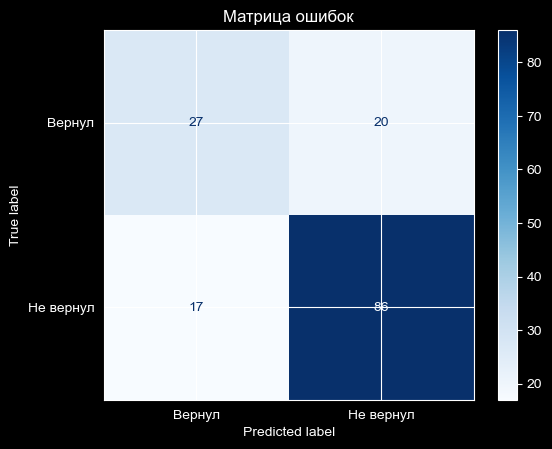

In [7]:
# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Вернул", "Не вернул"])
disp.plot(cmap='Blues')
plt.title("Матрица ошибок")
plt.show()

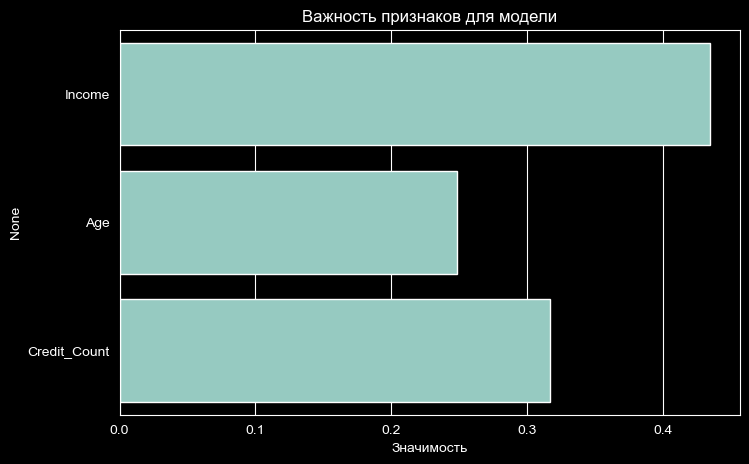

In [8]:
# Важность признаков
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title('Важность признаков для модели')
plt.xlabel('Значимость')
plt.show()

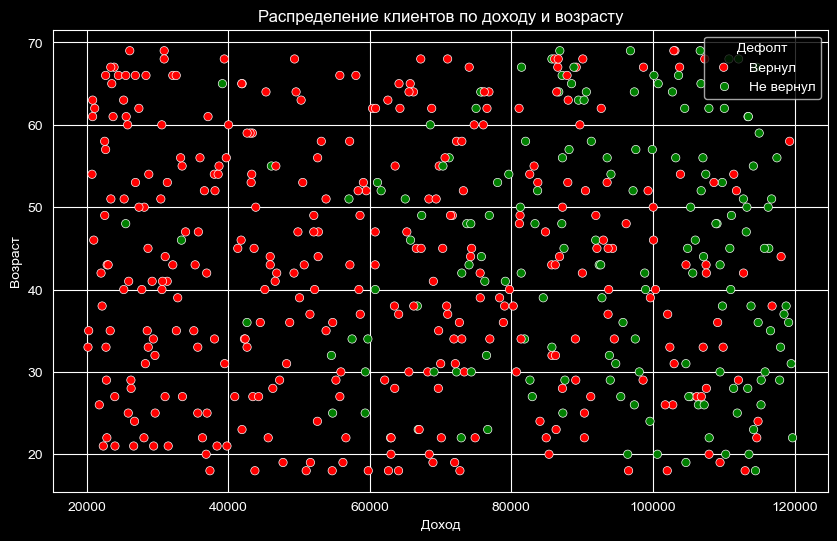

In [9]:
# Визуализация распределения клиентов
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='Income', y='Age', hue='Default', palette={0:'green',1:'red'})
plt.title('Распределение клиентов по доходу и возрасту')
plt.xlabel('Доход')
plt.ylabel('Возраст')
plt.legend(title='Дефолт', labels=['Вернул', 'Не вернул'])
plt.show()

Что делает этот код:
1. Генерирует данные о клиентах банка с признаками: доход, возраст и количество
открытых кредитов.
2. Формирует целевую переменную — вероятность невозврата кредита зависит от низкого
дохода, большого числа кредитов и возраста.
3. Создает модель градиентного бустинга с помощью XGBoost и обучает её.
4. Оценивает точность модели и показывает матрицу ошибок, чтобы увидеть, где модель
ошибается.
5. Визуализирует важность признаков, чтобы понять, какие факторы сильнее всего влияют
на предсказание.
6. Строит график распределения клиентов, выделяя тех, кто вернул кредит и тех, кто не
вернул.

Интерпретация результата:
- На матрице ошибок можно увидеть, сколько клиентов модель правильно отнесла к
дефолтным и надежным.
- График важности признаков покажет, какие характеристики клиентов сильнее влияют на
вероятность невозврата.
- На диаграмме с клиентами красные точки — это те, кто не вернул кредит, а зеленые —
те, кто выплатил долг. Это помогает увидеть зависимости между доходом, возрастом и
рисками невозврата.

Преимущества градиентного бустинга заключаются в его высокой точности и
способности справляться со сложными задачами. Он хорошо работает даже тогда, когда
зависимости между признаками сложные и нелинейные. Но есть и минусы: градиентный
бустинг чувствителен к переобучению, особенно если в данных много шума, и требует
больше времени на обучение по сравнению с более простыми моделями.

Чтобы избежать переобучения, часто используют методы вроде ограничения
глубины деревьев или настройки скорости обучения. Также существуют более быстрые и
оптимизированные версии градиентного бустинга, например, XGBoost и LightGBM, которые
широко применяются в задачах анализа данных и часто выигрывают соревнования по
машинному обучению.

Таким образом, бустинг и его разновидность — градиентный бустинг — позволяют
создавать очень точные модели, которые шаг за шагом учатся на ошибках и становятся всё
лучше, напоминая процесс постоянного самосовершенствования.